In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# 0. Описание задачи
Определение диапозона цен на телефоны при известных параметрах: емкость батареи, поддержка bluetooth, количество симкарт и других.
## 1. Загрузка и чтение данных
Весь датасет находится в репозитории для сдачи лабораторный работ в папке DataSet

In [2]:
url = "https://raw.githubusercontent.com/BelikJulia/machine-learning/main/DataSet/MP.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(3000, 21)

Таблица содержит данный о 3001 модели телефонов с описанием 20 параметров

In [3]:
data_raw.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,NaN,NaN,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1


Признаки:
1. battery_power - емкость батареи в mAh
2. blue - наличие Bluetooth (0 - нет, 1 - да)
3. clock_speed - скорость, с которой микропроцессор выполняет инструкции 
4. dual_sim - поддержка двух SIM-карт (0 - нет, 1 - да)
5. fc - разрешение фронтальной камеры в Мп
6. four_g - поддержка 4G (0 - нет, 1 - да)
7. int_memory - внутренняя память в Гб
8. m_dep - глубина телефона в см
9. mobile_wt - вес телефона
10. n_cores - количество ядер процессора
11. pc - разрешение основной камеры в Мп
12. px_height - разрешение в высоту в пикселях
13. px_width - разрешение в ширину в пикселях
14. ram - оперативная память в Мб
15. sc_h - высота экрана в см
16. sc_w - ширина экрана в см
17. talk_time - максимальное время, в течение которого хватит одной зарядки аккумулятора, когда вы говорите по телефону
18. three_g - поддержка 3G (0 - нет, 1 - да)
19. touch_screen - наличие сенсорного экрана (0 - нет, 1 - да)
20. wifi - наличие wifi (0 - нет, 1 - да)
21. price_range - ценовой диапазон

In [4]:
data_raw.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Имена строк (совпадают с номерами)

In [5]:
data_raw.index

RangeIndex(start=0, stop=3000, step=1)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2995 non-null   float64
 1   blue           2990 non-null   float64
 2   clock_speed    2996 non-null   float64
 3   dual_sim       2988 non-null   float64
 4   fc             2995 non-null   float64
 5   four_g         2989 non-null   float64
 6   int_memory     2995 non-null   float64
 7   m_dep          2995 non-null   float64
 8   mobile_wt      2995 non-null   float64
 9   n_cores        2995 non-null   float64
 10  pc             2993 non-null   float64
 11  px_height      2994 non-null   float64
 12  px_width       2997 non-null   float64
 13  ram            2997 non-null   float64
 14  sc_h           2993 non-null   float64
 15  sc_w           2994 non-null   float64
 16  talk_time      2995 non-null   float64
 17  three_g        2994 non-null   float64
 18  touch_sc

 0. battery_power - числовой 
 1. blue - категориальный (2)
 2. clock_speed - числовой
 3. dual_sim - категориальный (2)
 4. fc - числовой
 5. four_g - категориальный (2)
 6. int_memory - числовой
 7. m_dep - числовой
 8. mobile_wt - числовой
 9. n_cores - числовой
 10. pc - числовой
 11. px_height - числовой
 12. px_width - числовой
 13. ram - числовой
 14. sc_h - числовой
 15. sc_w - числовой
 16. talk_time - числовой
 17. three_g - категориальный (2)
 18. touch_screen - категориальный (2)
 19. wifi - категориальный (2)
 20. price_range - категориальный (4)
 
### Обработка выбросов

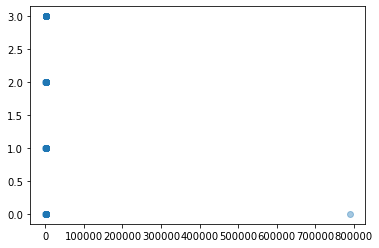

In [7]:
plt.scatter(data_raw['battery_power'], data_raw['price_range'], alpha=0.4)
pass

Заметим, что есть выбросы

In [8]:
data_raw['battery_power'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     504.00
0.010     510.94
0.050     569.70
0.100     642.00
0.500    1234.00
0.900    1854.00
0.950    1933.00
0.990    1987.06
0.995    1993.03
Name: battery_power, dtype: float64

99,9% значений емкости батареи находятся в диапазоне от 504 до 1993

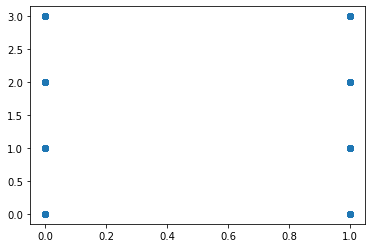

In [9]:
plt.scatter(data_raw['blue'], data_raw['price_range'], alpha=0.4)
pass

In [10]:
data_raw['blue'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.0
0.010    0.0
0.050    0.0
0.100    0.0
0.500    1.0
0.900    1.0
0.950    1.0
0.990    1.0
0.995    1.0
Name: blue, dtype: float64

Выбросов нет

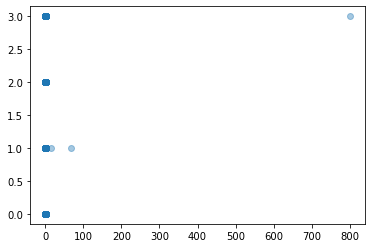

In [11]:
plt.scatter(data_raw['clock_speed'], data_raw['price_range'], alpha=0.4)
pass

In [12]:
data_raw['clock_speed'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.5
0.010    0.5
0.050    0.5
0.100    0.5
0.500    1.5
0.900    2.7
0.950    2.9
0.990    3.0
0.995    3.0
Name: clock_speed, dtype: float64

Есть выбросы, которые удалим далее

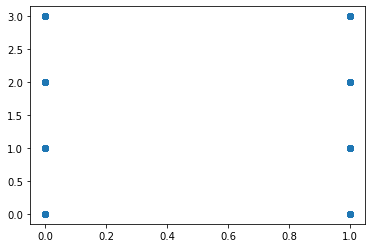

In [13]:
plt.scatter(data_raw['dual_sim'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

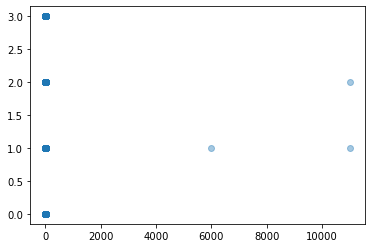

In [14]:
plt.scatter(data_raw['fc'], data_raw['price_range'], alpha=0.4)
pass

In [15]:
data_raw['fc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     3.0
0.900    11.0
0.950    13.0
0.990    17.0
0.995    18.0
Name: fc, dtype: float64

Есть выбросы

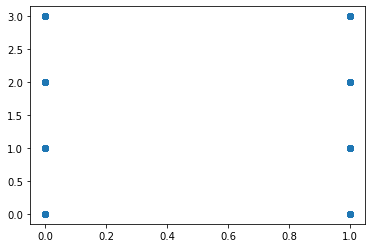

In [16]:
plt.scatter(data_raw['four_g'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

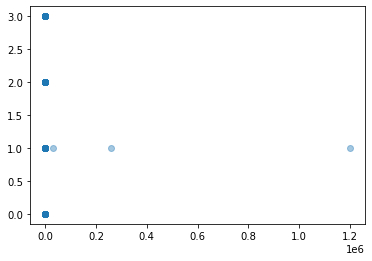

In [17]:
plt.scatter(data_raw['int_memory'], data_raw['price_range'], alpha=0.4)
pass

In [18]:
data_raw['int_memory'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     5.0
0.100     8.0
0.500    33.0
0.900    58.0
0.950    61.0
0.990    64.0
0.995    64.0
Name: int_memory, dtype: float64

Есть выбросы

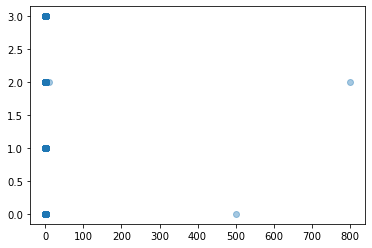

In [19]:
plt.scatter(data_raw['m_dep'], data_raw['price_range'], alpha=0.4)
pass

In [20]:
data_raw['m_dep'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.1
0.010    0.1
0.050    0.1
0.100    0.1
0.500    0.5
0.900    0.9
0.950    1.0
0.990    1.0
0.995    1.0
Name: m_dep, dtype: float64

Есть выбросы

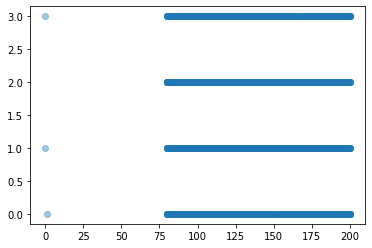

In [21]:
plt.scatter(data_raw['mobile_wt'], data_raw['price_range'], alpha=0.4)
pass

In [22]:
data_raw['mobile_wt'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     80.0
0.010     80.0
0.050     85.0
0.100     91.0
0.500    140.0
0.900    189.0
0.950    195.3
0.990    199.0
0.995    200.0
Name: mobile_wt, dtype: float64

Есть выбросы

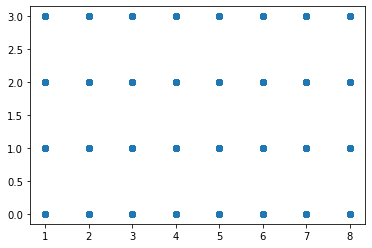

In [23]:
plt.scatter(data_raw['n_cores'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

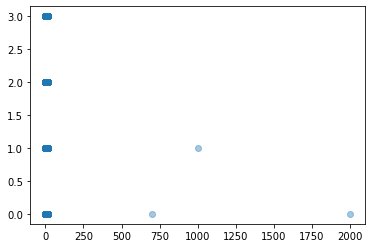

In [24]:
plt.scatter(data_raw['pc'], data_raw['price_range'], alpha=0.4)
pass

In [25]:
data_raw['pc'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     1.0
0.100     1.0
0.500    10.0
0.900    18.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: pc, dtype: float64

Есть выбросы

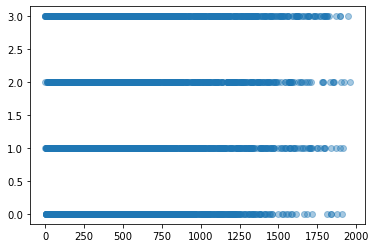

In [26]:
plt.scatter(data_raw['px_height'], data_raw['price_range'], alpha=0.4)
pass

In [27]:
data_raw['px_height'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       4.00
0.010       9.93
0.050      62.00
0.100     118.00
0.500     564.50
0.900    1284.70
0.950    1464.70
0.990    1790.07
0.995    1842.35
Name: px_height, dtype: float64

Выбросов нет

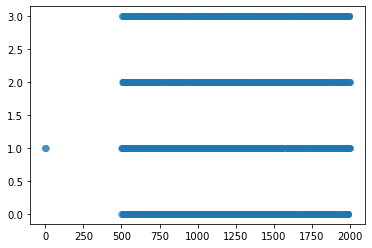

In [28]:
plt.scatter(data_raw['px_width'], data_raw['price_range'], alpha=0.4)
pass

In [29]:
data_raw['px_width'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     507.00
0.010     512.00
0.050     571.00
0.100     647.60
0.500    1247.00
0.900    1846.00
0.950    1923.00
0.990    1985.00
0.995    1989.02
Name: px_width, dtype: float64

Есть выбросы

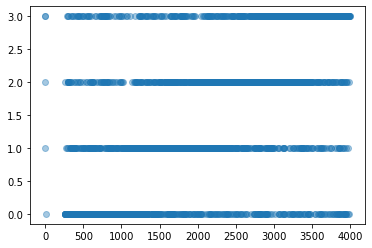

In [30]:
plt.scatter(data_raw['ram'], data_raw['price_range'], alpha=0.4)
pass

In [31]:
data_raw['ram'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     267.00
0.010     292.96
0.050     433.80
0.100     594.60
0.500    2144.00
0.900    3628.00
0.950    3833.20
0.990    3955.08
0.995    3970.00
Name: ram, dtype: float64

Есть выбросы

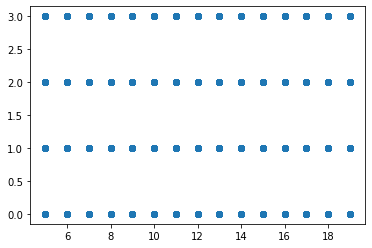

In [32]:
plt.scatter(data_raw['sc_h'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

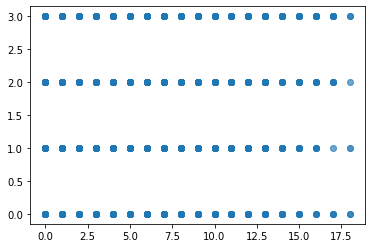

In [33]:
plt.scatter(data_raw['sc_w'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

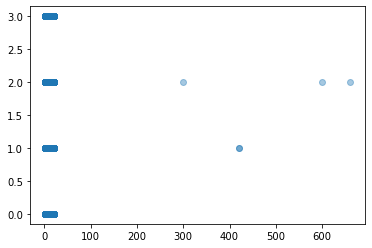

In [34]:
plt.scatter(data_raw['talk_time'], data_raw['price_range'], alpha=0.4)
pass

In [35]:
data_raw['talk_time'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     2.0
0.010     2.0
0.050     2.7
0.100     4.0
0.500    11.0
0.900    19.0
0.950    20.0
0.990    20.0
0.995    20.0
Name: talk_time, dtype: float64

Выбросы есть

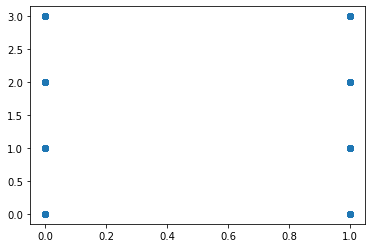

In [36]:
plt.scatter(data_raw['three_g'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

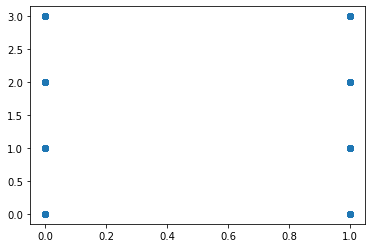

In [37]:
plt.scatter(data_raw['touch_screen'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

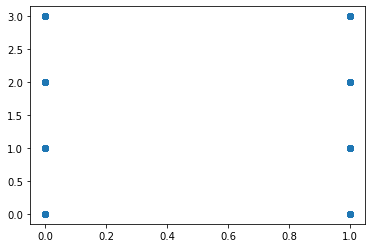

In [38]:
plt.scatter(data_raw['wifi'], data_raw['price_range'], alpha=0.4)
pass

Выбросов нет

Удалим все строки таблицы, в которых признаки с выбросами выходят за пределы квантилей $0.005$, $0.995$.

In [39]:
rows_to_drop = data_raw[
    (data_raw['battery_power'] < data_raw['battery_power'].quantile(0.005)) | (data_raw['battery_power'] > data_raw['battery_power'].quantile(0.995)) | 
    (data_raw['clock_speed']  < data_raw['clock_speed' ].quantile(0.005)) | (data_raw['clock_speed']  > data_raw['clock_speed' ].quantile(0.995)) | 
    (data_raw['fc']  < data_raw['fc' ].quantile(0.005)) | (data_raw['fc']  > data_raw['fc' ].quantile(0.995)) |
    (data_raw['int_memory']  < data_raw['int_memory' ].quantile(0.005)) | (data_raw['int_memory']  > data_raw['int_memory' ].quantile(0.995)) | 
    (data_raw['m_dep']  < data_raw['m_dep' ].quantile(0.005)) | (data_raw['m_dep']  > data_raw['m_dep' ].quantile(0.995)) |
    (data_raw['mobile_wt']  < data_raw['mobile_wt' ].quantile(0.005)) | (data_raw['mobile_wt']  > data_raw['mobile_wt' ].quantile(0.995)) | 
    (data_raw['pc']  < data_raw['pc' ].quantile(0.005)) | (data_raw['pc']  > data_raw['pc' ].quantile(0.995)) |
    (data_raw['px_width']  < data_raw['px_width' ].quantile(0.005)) | (data_raw['px_width']  > data_raw['px_width' ].quantile(0.995)) | 
    (data_raw['ram']  < data_raw['ram' ].quantile(0.005)) | (data_raw['ram']  > data_raw['ram' ].quantile(0.995)) |
    (data_raw['talk_time']  < data_raw['talk_time' ].quantile(0.005)) | (data_raw['talk_time']  > data_raw['talk_time' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(2892, 21)

In [40]:
rows_to_drop

Int64Index([  18,   24,   43,   61,   69,   94,  152,  167,  185,  193,
            ...
            2520, 2539, 2580, 2597, 2637, 2706, 2732, 2969, 2976, 2982],
           dtype='int64', length=108)

 ## 2. Визуализация данных и вычисление основных характеристик

In [41]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2889.000000,2882.000000,2888.000000,2882.000000,2888.000000,2881.000000,2887.000000,2887.000000,2887.000000,2887.000000,...,2886.000000,2889.000000,2890.000000,2885.000000,2886.000000,2887.000000,2886.00000,2889.000000,2889.000000,2892.000000
mean,1241.237452,0.503817,1.528566,0.511450,4.378809,0.507116,32.605819,0.505819,140.118116,4.447523,...,638.255544,1244.218415,2129.287889,12.184402,5.586625,11.042951,0.75745,0.502942,0.507788,1.484440
std,435.361349,0.500072,0.823072,0.499956,4.358684,0.500036,18.124191,0.285636,35.185868,2.292067,...,439.787173,431.753477,1079.198267,4.247782,4.317705,5.473513,0.42870,0.500078,0.500026,1.116571
min,504.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,507.000000,267.000000,5.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000
25%,864.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,275.000000,864.000000,1214.000000,9.000000,2.000000,6.000000,1.00000,0.000000,0.000000,0.000000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,141.000000,4.000000,...,565.000000,1247.000000,2153.500000,12.000000,5.000000,11.000000,1.00000,1.000000,1.000000,1.000000
75%,1617.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,931.750000,1629.000000,3059.750000,16.000000,8.000000,16.000000,1.00000,1.000000,1.000000,2.000000
max,1993.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1989.000000,3970.000000,19.000000,18.000000,20.000000,1.00000,1.000000,1.000000,3.000000


В описании видим:

1. count - количество значений для каждого признака. Из-за пропусков в таблице все значения различны. Минимальное значение у dual_sim = 2881, число пропусков = 11, что составлеят 0,4% от общего числа.
2. mean - среднее значение
3. std - стандартное отклонение
4. min - минимальное значение 
5. 25% - первый квартиль
6. 50% - медиана
7. 75% - третий квартиль
8. max - максимальное значение (заметим подозрительно большие значения - выбросы, с которыми будм бороться в дальнейшем)

Рассмотрим некоторые из характеристик

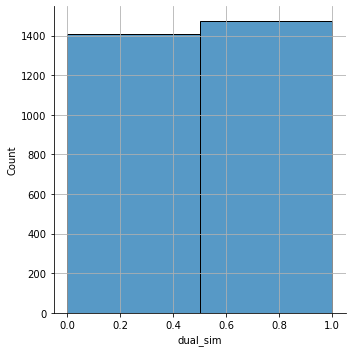

In [42]:
sns.displot(data['dual_sim'], bins=2)
plt.grid()
pass

На гистограмме видно распределение по 2 категориям: наличие и отсутствие поддержки 2 симкарт. Среднее значение = 0.511450., отклонение = 0.499956 и 75% = 1. Можно сделать вывод, что чуть больше половины моделей имеет 2 симкарты.

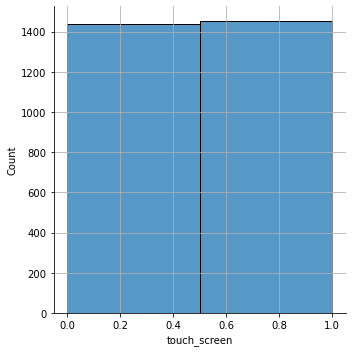

In [43]:
sns.displot(data['touch_screen'], bins=2)
plt.grid()
pass

Видим нормальное распределение по категориям: наличие и отсутствие сенсорного экрана. При среднем = 0.502942 и отклонении = 0.500078, то есть, число моделей с сенсорным экраном и обычным примерно равны.

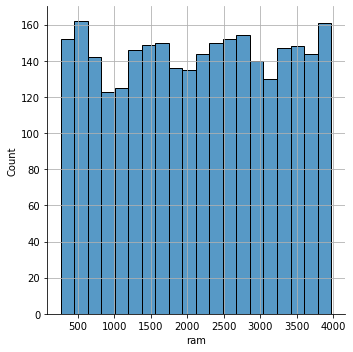

In [44]:
sns.displot(data['ram'], bins=20)
plt.grid()
pass

Распределение оперативной памяти при среднем = 2129 и отклонении = 1079. При этом 25% = 1214, 50% = 2153, 75% = 3060. 

Вычислим матрицу корреляции

In [45]:
corr_matrix = data.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.011036,-0.003906,-0.045550,0.026354,-0.002826,0.000120,0.024801,-0.013987,-0.017992,...,0.024465,0.013516,-0.011973,-0.046432,-0.031701,0.034727,0.016383,-0.010256,-0.002667,0.125416
blue,-0.011036,1.000000,0.030063,0.015893,-0.017909,0.005131,0.030997,0.015312,-0.004707,0.027085,...,-0.021561,-0.030947,0.042629,-0.001254,-0.000812,-0.007364,-0.019206,-0.008036,-0.006709,0.018435
clock_speed,-0.003906,0.030063,1.000000,0.000122,0.008186,-0.042194,-0.004440,-0.006059,0.002963,-0.011779,...,-0.009886,0.016592,0.009285,-0.029317,-0.016415,-0.035416,-0.040529,0.031627,-0.034618,-0.007072
dual_sim,-0.045550,0.015893,0.000122,1.000000,0.001027,0.009079,-0.008131,-0.009951,-0.009938,-0.015167,...,-0.011380,0.013076,0.042413,-0.008950,-0.009231,-0.023975,-0.005686,0.007883,0.033362,0.005593
fc,0.026354,-0.017909,0.008186,0.001027,1.000000,0.003252,-0.025360,0.008105,0.026626,-0.001845,...,-0.012181,0.004417,-0.001380,0.007687,-0.002178,-0.022223,-0.002446,-0.001031,-0.008320,0.019970
four_g,-0.002826,0.005131,-0.042194,0.009079,0.003252,1.000000,-0.013895,-0.000166,-0.011626,0.002577,...,-0.003107,0.019322,0.016773,0.012477,0.025503,-0.029387,0.574514,0.008934,-0.023898,0.017764
int_memory,0.000120,0.030997,-0.004440,-0.008131,-0.025360,-0.013895,1.000000,-0.001654,-0.024645,-0.016797,...,-0.004154,-0.013669,0.019511,0.018765,0.015554,0.010695,-0.014205,-0.002711,0.008933,0.016394
m_dep,0.024801,0.015312,-0.006059,-0.009951,0.008105,-0.000166,-0.001654,1.000000,-0.000140,-0.006297,...,0.034499,0.022965,0.000478,-0.025951,-0.018419,0.015854,-0.027267,0.016135,-0.033811,-0.007218
mobile_wt,-0.013987,-0.004707,0.002963,-0.009938,0.026626,-0.011626,-0.024645,-0.000140,1.000000,-0.026891,...,0.009051,-0.006512,0.013205,-0.028354,-0.010790,-0.009635,0.000557,0.010636,0.025156,-0.009145
n_cores,-0.017992,0.027085,-0.011779,-0.015167,-0.001845,0.002577,-0.016797,-0.006297,-0.026891,1.000000,...,-0.021810,-0.005965,-0.008014,-0.005618,0.025884,0.007883,0.006688,0.010871,-0.012614,0.015841


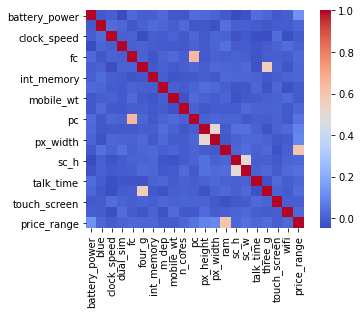

In [46]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [47]:
corr_matrix >= 0.5

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
blue,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
clock_speed,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
dual_sim,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fc,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
four_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
int_memory,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
m_dep,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
mobile_wt,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
n_cores,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Коэффициент корреляции > 0,5 имеют: px_width и px_height, sc_h и sc_w, four_g и three_g, price_range и ram, что говорит о наличие связи между признаками.
Для признаков, у которых коэффициент корреляции < 0,5, можно сказать, что связь между ними слабая

Перейдем к рассмотрению категориальных признаков

In [48]:
data['blue'].value_counts()

1.0    1452
0.0    1430
Name: blue, dtype: int64

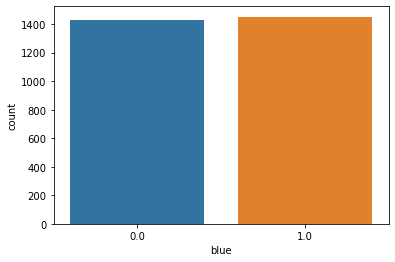

In [49]:
sns.countplot(x='blue', data=data)
pass

Число моделей с bluetooth приблизительно равно числу моделей без него.

In [50]:
data['dual_sim'].value_counts()

1.0    1474
0.0    1408
Name: dual_sim, dtype: int64

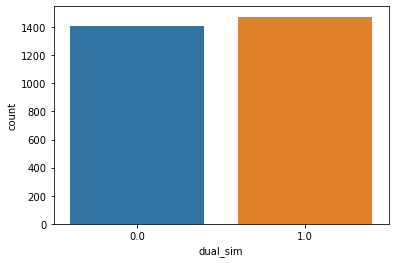

In [51]:
sns.countplot(x='dual_sim', data=data)
pass

Число моделей с поддержкой 2 симкарт немного больше.

In [52]:
data['four_g'].value_counts()

1.0    1461
0.0    1420
Name: four_g, dtype: int64

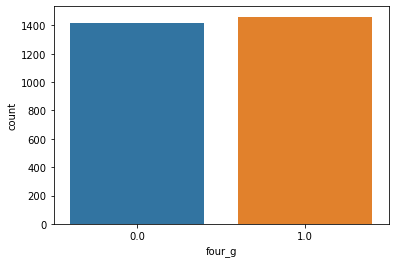

In [53]:
sns.countplot(x='four_g', data=data)
pass

Число моделей с поддержкой 4G немного больше.

In [54]:
data['three_g'].value_counts()

1.0    2186
0.0     700
Name: three_g, dtype: int64

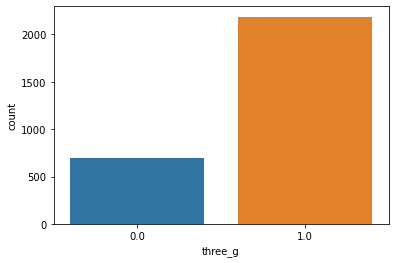

In [55]:
sns.countplot(x='three_g', data=data)
pass

Число моделей с поддержкой 3G примерно в 3 раза больше

In [56]:
data['touch_screen'].value_counts()

1.0    1453
0.0    1436
Name: touch_screen, dtype: int64

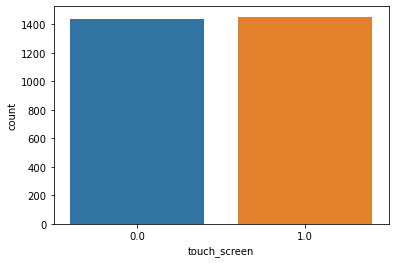

In [57]:
sns.countplot(x='touch_screen', data=data)
pass

Число моделей с сенсорным экраном приблизительно равно числу моделей без него

In [58]:
data['wifi'].value_counts()

1.0    1467
0.0    1422
Name: wifi, dtype: int64

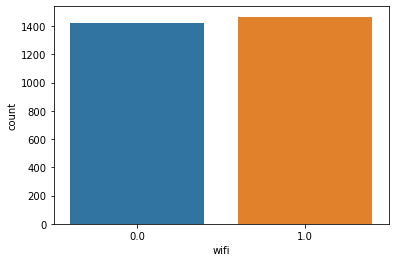

In [59]:
sns.countplot(x='wifi', data=data)
pass

Число моделей с поддержкой WiFi немного больше.

In [60]:
data['price_range'].value_counts()

0    734
1    730
2    721
3    707
Name: price_range, dtype: int64

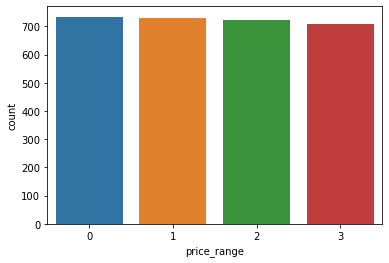

In [61]:
sns.countplot(x='price_range', data=data)
pass

Ценовой диапозон выставлен примерно одинаково

## 3. Обработка пропущенных значений 
Число пропущенных значений мало - удалим строки с пропущенными значениями

In [62]:
data.dropna(axis=0, how='all', subset=['battery_power'], inplace=True)
data.dropna(axis=0, how='all', subset=['blue'], inplace=True)
data.dropna(axis=0, how='all', subset=['clock_speed'], inplace=True)
data.dropna(axis=0, how='all', subset=['dual_sim'], inplace=True)
data.dropna(axis=0, how='all', subset=['fc'], inplace=True)
data.dropna(axis=0, how='all', subset=['four_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['int_memory'], inplace=True)
data.dropna(axis=0, how='all', subset=['m_dep'], inplace=True)
data.dropna(axis=0, how='all', subset=['mobile_wt'], inplace=True)
data.dropna(axis=0, how='all', subset=['n_cores'], inplace=True)
data.dropna(axis=0, how='all', subset=['pc'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_height'], inplace=True)
data.dropna(axis=0, how='all', subset=['px_width'], inplace=True)
data.dropna(axis=0, how='all', subset=['ram'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_h'], inplace=True)
data.dropna(axis=0, how='all', subset=['sc_w'], inplace=True)
data.dropna(axis=0, how='all', subset=['talk_time'], inplace=True)
data.dropna(axis=0, how='all', subset=['three_g'], inplace=True)
data.dropna(axis=0, how='all', subset=['touch_screen'], inplace=True)
data.dropna(axis=0, how='all', subset=['wifi'], inplace=True)
print(data.shape)
data.isna().sum()

(2785, 21)


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 4. Обработка категориальных признаков
Все категориальные признаки уже заданы числовыми значениями
## 5. Нормализация
Проведем нормализацию с помощью линейного преобразования к отрезку [0, 1]

In [63]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,...,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,0.495550,0.504847,0.411619,0.509515,0.243886,0.507361,0.493016,0.452703,0.501538,0.493665,...,0.324988,0.497683,0.503888,0.512439,0.309655,0.501576,0.757989,0.501257,0.508079,0.496349
std,0.291676,0.500066,0.329427,0.499999,0.242487,0.500036,0.292439,0.317942,0.292959,0.327604,...,0.223974,0.291744,0.291065,0.303096,0.239730,0.303923,0.428378,0.500088,0.500025,0.371708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243116,0.000000,0.080000,0.000000,0.055556,0.000000,0.225806,0.111111,0.241667,0.142857,...,0.140306,0.240891,0.256819,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.000000
50%,0.490262,1.000000,0.400000,1.000000,0.166667,1.000000,0.500000,0.444444,0.508333,0.428571,...,0.287755,0.499325,0.511747,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.333333
75%,0.746138,1.000000,0.720000,1.000000,0.388889,1.000000,0.741935,0.777778,0.750000,0.714286,...,0.472959,0.757760,0.754253,0.785714,0.444444,0.777778,1.000000,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Обучающая и тестовая выборки
Для классификации используем все признаки. Разобьем данные на обучающую и тестовую выборки. За обучающую примем 75%, оставшиеся  - за тестовую

In [64]:
X = data_norm.drop(['price_range'], axis=1)
y = data['price_range']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(2088, 697)

## 7-8-9. Обучение модели
### K ближайших соседей
Пусть К = 5 (по умолчанию)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_def = KNeighborsClassifier()
knn_def.fit(X_train, y_train)
knn_train_pred = 100 * knn_def.score(X_train, y_train)
knn_test_pred = 100 * knn_def.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 54.93%, Test: 32.28%. 


Увеличим число соседей до 7

In [66]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)
knn_train_pred = 100 * knn_7.score(X_train, y_train)
knn_test_pred = 100 * knn_7.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 51.44%, Test: 30.85%. 


Точность полученной модели снизилась, попробуем К = 3

In [67]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
knn_train_pred = 100 * knn_3.score(X_train, y_train)
knn_test_pred = 100 * knn_3.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_train_pred, knn_test_pred))

Accuracy. Train : 60.68%, Test: 31.71%. 


Точность увеличилась. Вычислим среднеквадратическую ошибку для алгоритма с количеством ближайших соседей по умолчанию

In [68]:
knn_train_pred = knn_def.score(X_train, y_train)
knn_test_pred = knn_def.score(X_test, y_test)
MSE_train = np.mean((knn_train_pred - y_train)**2)
MSE_test  = np.mean((knn_test_pred - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 2.14, Test: 2.57. 


### Дерево решений
Воспользуемся параметрами по умолчанию - глубина отсутствует

In [69]:
from sklearn.tree import DecisionTreeClassifier
desTrCl = DecisionTreeClassifier()
desTrCl.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl.score(X_train, y_train)
print ('Depth:', desTrCl.get_depth())
print ('Leaves:', desTrCl.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 21
Leaves: 574
Accuracy. Train : 100.00%, Test: 49.07%. 


Максимальная глубина = 21. Уменьшим до 10

In [70]:
desTrCl_10 = DecisionTreeClassifier(max_depth=10)
desTrCl_10.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_10.score(X_train, y_train)
print ('Depth:', desTrCl_10.get_depth())
print ('Leaves:', desTrCl_10.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_10.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 10
Leaves: 334
Accuracy. Train : 87.40%, Test: 55.95%. 


Качество модели на тестовой выборке повысилось, а на обучающей снизилось.

Увеличим глубину до 15

In [71]:
desTrCl_15 = DecisionTreeClassifier(max_depth=15)
desTrCl_15.fit(X_train,y_train)
desTrCl_train_sc = 100 * desTrCl_15.score(X_train, y_train)
print ('Depth:', desTrCl_15.get_depth())
print ('Leaves:', desTrCl_15.get_n_leaves())
desTrCl_test_sc = 100 * desTrCl_15.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(desTrCl_train_sc, desTrCl_test_sc))

Depth: 15
Leaves: 526
Accuracy. Train : 97.56%, Test: 50.36%. 


Качество модели на тестовой выборке снизилось, а на обучающей повысилось.

Алгоритм дерева решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой.

## 10. Общие выводы

В работе производился анализ данных о ценовом диапазоне мобильных телефонов и решение задачи классификации с помощью моделей, которые были натренированы методами К-ближайших соседей и дерева решений.

Перед тренировкой моделей была произведена подготовка данных:
1. Работа с выбросами
2. Вычисление основных статистических характеристик и их анализ
3. Обработка пропущенных значений (удаление строк с пропущенными значениями)
4. Нормализация количественных признаков (с помощью линейного преобразования к отрезку [0, 1])
5. Разбиение данных на обучающую и тестовую выборки
6. Выбор алгоритма классификации и проверка качества модели

Алгоритм дерева решений оказался лучше метода к-ближайших соседей (в этой работе).